In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/FINAL_COMBINED_AUGMENT_DATASET_FOR_PAPER_FOR_MODEL2"

In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)

['Fresh', 'NonFresh']


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

Fresh
NonFresh


##### don't run augmentation

Augmentation

In [ ]:
def augment(image_path, folder_path):
  datagen_intial = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")
  image=load_img(image_path, grayscale=False, color_mode='rgb', target_size=(225,225))
  image=img_to_array(image)
  # image=image/255.0
  image = image.reshape((1,) + image.shape)
  i = 0
  for batch in datagen_intial.flow(image, batch_size=1, 
                                    save_to_dir= folder_path,
                                    save_prefix = 'fish', save_format = 'jpeg'):
    i += 1
    if i > 20:
      break

src_path = "/content/drive/MyDrive/FINAL_FISH_dataset_for_paper_for_model_copy"
dest_path = "/content/drive/MyDrive/FINAL_COMBINED_AUGMENT_DATASET_FOR_PAPER_FOR_MODEL"
for file in File:
  path = os.path.join(directory,file)
  dest_path1 = os.path.join(dest_path, file)
  for im in os.listdir(path):
    augment(os.path.join(path,im), dest_path1)

seperating training and testing data

In [ ]:
trainx0=[]
testx0=[]
trainy0=[]
testy0=[]
count=0
for file in File:
  path=os.path.join(directory,file)
  t=0
  for im in os.listdir(path):
    image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(50,50))
    image=img_to_array(image)
    image=image/255.0
    n=len(os.listdir(path))
    if t<(n//10)*8:
        trainx0.append(image)
        trainy0.append(count)
    else:   
        testx0.append(image)
        testy0.append(count)
    t+=1
  count=count+1
  print(len(trainx0), len(testx0), len(trainy0), len(testy0))

640 161 640 161
1280 324 1280 324


In [ ]:
print(len(trainx0), len(testx0), len(trainy0), len(testy0))

1280 324 1280 324


In [ ]:

trainy2=to_categorical(trainy0)
X_train=np.array(trainx0).reshape(-1,50,50,3)
y_train=np.array(trainy2)

In [ ]:
X_test=np.array(testx0).reshape(-1,50,50,3)

Splitting training data into training and validation

In [ ]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1024, 50, 50, 3)
(256, 50, 50, 3)
(1024, 2)
(256, 2)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

Developing Model

In [ ]:
pretrained_model3 = tf.keras.applications.densenet.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Training

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
32/32 [==============================] - 27s 168ms/step - loss: 0.3620 - accuracy: 0.8145 - val_loss: 0.1692 - val_accuracy: 0.9375
Epoch 2/30
32/32 [==============================] - 2s 53ms/step - loss: 0.2191 - accuracy: 0.9209 - val_loss: 0.1271 - val_accuracy: 0.9570
Epoch 3/30
32/32 [==============================] - 2s 49ms/step - loss: 0.1395 - accuracy: 0.9512 - val_loss: 0.0791 - val_accuracy: 0.9609
Epoch 4/30
32/32 [==============================] - 2s 48ms/step - loss: 0.1312 - accuracy: 0.9521 - val_loss: 0.0516 - val_accuracy: 0.9805
Epoch 5/30
32/32 [==============================] - 2s 52ms/step - loss: 0.1023 - accuracy: 0.9648 - val_loss: 0.0460 - val_accuracy: 0.9844
Epoch 6/30
32/32 [==============================] - 3s 83ms/step - loss: 0.1389 - accuracy: 0.9570 - val_loss: 0.0469 - val_accuracy: 0.9844
Epoch 7/30
32/32 [==============================] - 2s 48ms/step - loss: 0.1075 - accuracy: 0.9658 - val_loss: 0.0530 - val_accuracy: 0.9844
Epoch 8/30


Model Validation

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

8/8 [==============================] - 3s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       122
           1       0.96      1.00      0.98       134

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



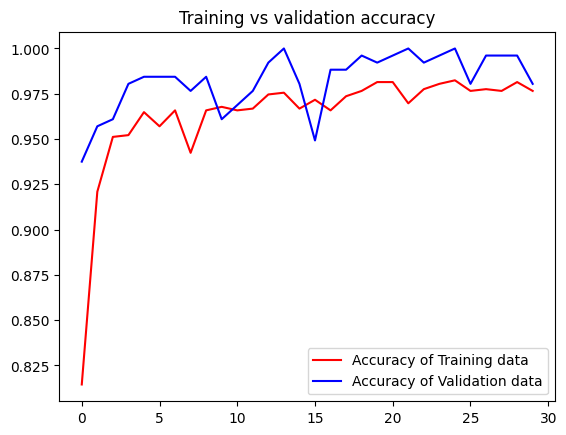

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

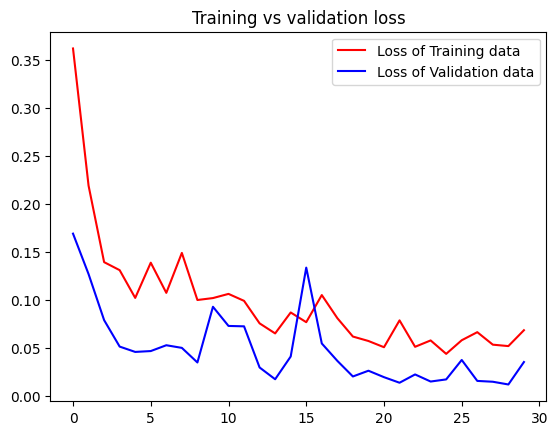

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Model Evaluation

In [ ]:
pred2=model.predict(X_test)
print(pred2[0:10])

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

11/11 [==============================] - 4s 139ms/step
[[9.9999559e-01 4.4329590e-06]
 [1.0000000e+00 3.0563549e-09]
 [9.9996042e-01 3.9597784e-05]
 [9.9999893e-01 1.0294550e-06]
 [1.0000000e+00 5.6242104e-09]
 [9.9997449e-01 2.5485040e-05]
 [1.0000000e+00 3.0710471e-08]
 [9.9999857e-01 1.3714464e-06]
 [9.9998510e-01 1.4946804e-05]
 [9.9994600e-01 5.3990076e-05]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
ANS=testy0
ANS[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

1.0


Testing

In [ ]:
directory_test = "/content/drive/MyDrive/Test_purpose_281122"

In [ ]:
test_File=[]
for file in os.listdir(directory_test):
    test_File+=[file]
    print(file)

NonfreshEyes.webp
FreshFishEyes.jpg
NonFreshEyes1.jpeg
fresh_gills1.jfif
fresh_gills17-12.jfif
fresh_eyes17-12.jfif
fresh_eyes2.jfif
NF.png
Fresh.jpg
NonFreshEyes.jpeg


In [ ]:
for file in test_File:
  path0 = os.path.join(directory_test, file)
  image=load_img(path0,target_size=(50,50))

  image=img_to_array(image) 
  image=image/255.0
  prediction_image=np.array(image)
  prediction_image= np.expand_dims(image, axis=0)
  prediction=model.predict(prediction_image)
  value=np.argmax(prediction)
  move_name=mapper(value)
  print("Prediction is {}.".format(move_name))

1/1 [==============================] - 1s 1s/step
Prediction is NonFresh.
1/1 [==============================] - 0s 39ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 47ms/step
Prediction is NonFresh.
1/1 [==============================] - 0s 37ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 37ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 35ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 37ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 60ms/step
Prediction is NonFresh.
1/1 [==============================] - 0s 53ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 35ms/step
Prediction is NonFresh.


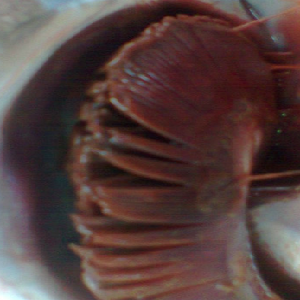

In [ ]:
path0 = "/content/drive/MyDrive/Test_purpose_281122/NF.png"
load_img(path0,target_size=(300,300))

In [ ]:
image=load_img(path0,target_size=(50,50))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 42ms/step
Prediction is NonFresh.
